# 3. Machine Learning for Classification

Predict churn rate of a telco company with logistic regression using scikit-learn.


## 3.1 Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 3.2 Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
source_file_name = './data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [142]:
data = f'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/{source_file_name}'

In [143]:
# !wget $data -O data-week-3.csv 
!curl $data -o $source_file_name

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  954k  100  954k    0     0  1346k      0 --:--:-- --:--:-- --:--:-- 1350k


In [144]:
df = pd.read_csv(source_file_name)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [145]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [146]:
df.head().T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [147]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Convert senior citizen to boolean

In [148]:
df['seniorcitizen'] = df['seniorcitizen'].astype('bool')

Totalcharges has '-' in some values, so pd converts to object. Now convert totalcharges to float64 (numeric) and convert '-' in 0. Note: coerce means do not manage errors, so '-' are NaNs

In [149]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [150]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

Convert churn to integer, since this is a binary problem

In [151]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [154]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

train_test_split suffles the index of the dataframe. Reset index of dataframe. Actually not needed.

In [155]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [156]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [157]:
df_full_train = df_full_train.reset_index(drop=True)

Use is null on the full train df (ir returns True/False for each value, NaN or None are 'nulls', inf or empty strings are not) and sum() (sums for every column)

In [158]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Check distribution of the target. Value_counts in normalize shows the relative frequencies (%). The mean % of ones is the same because the churn is binary

In [159]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [160]:
global_churn_rate = round(df_full_train.churn.mean(),2)
global_churn_rate

0.27

In [161]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen          bool
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

customer id is considered as an unique identifier, so not categorical and not numerical

In [162]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [163]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [164]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

#### Churn rate

In [165]:
df_full_train.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male          False     yes        yes      12          yes   
1  6261-rcvns  female          False      no         no      42          yes   
2  2176-osjuv    male          False     yes         no      71          yes   
3  6161-erdgd    male          False     yes        yes      71          yes   
4  2364-ufrom    male          False      no         no      30          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   
3           yes             dsl                  yes  ...   
4            no             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   
3                  yes                  yes                  yes   
4                   no                  yes                  yes   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   
3                  yes  one_year               no           electronic_check   
4                   no  one_year               no           electronic_check   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  
3          85.45       6300.85      0  
4          70.40       2044.75      0  

[5 rows x 21 columns]

In [166]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [167]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [168]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [170]:
global_churn - churn_female

-0.006855983216553063

In [171]:
global_churn - churn_male

0.006754520462819769

In [172]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [173]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [174]:
global_churn - churn_partner

0.06493474245795922

In [175]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [176]:
global_churn - churn_no_partner

-0.05984095297455855

#### Risk ratio

churn of group / global churn. If >1, risk of churn is high. If <1, risk of churn is low.

In [177]:
churn_no_partner / global_churn

1.2216593879412643

In [178]:
churn_partner / global_churn

0.7594724924338315

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [179]:
from IPython.display import display

In [180]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980



seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
False          0.242270   4722 -0.027698  0.897403
True           0.413377    912  0.143409  1.531208



partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472



dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651



phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412



multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948



internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201



onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570



onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660



deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480



techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390



streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328



streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182



contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730



paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560



paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one (categorical) variable if we know the value of another. For example, how much we know about churn bt observing the gender variable. We can compare the results for each categorical feature in order to know which categorical variables affect more to churn, relatively.

* https://en.wikipedia.org/wiki/Mutual_information

In [181]:
from sklearn.metrics import mutual_info_score

In [182]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [183]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [184]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [185]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [186]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

Apply applies a function along an axis of a dataframe. object passed are series. Parameter axis = 0 (by default) means that the index of the series is the index of dataframe, so function is called for each dataframe column

In [187]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [188]:
df_full_train.tenure.max()

72

corrwith works as apply, so by default column (axis = 0 => index or series) is used

In [189]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [190]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [191]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [192]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [193]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [194]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [195]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [196]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [197]:
from sklearn.feature_extraction import DictVectorizer

In [198]:
df_train.iloc[:2]

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  8015-ihcgw  female          False     yes        yes      72          yes   
1  1960-uycnn    male          False      no         no      10          yes   

  multiplelines internetservice onlinesecurity onlinebackup deviceprotection  \
0           yes     fiber_optic            yes          yes              yes   
1           yes     fiber_optic             no          yes              yes   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0         yes         yes             yes        two_year              yes   
1          no          no             yes  month-to-month              yes   

      paymentmethod  monthlycharges  totalcharges  
0  electronic_check          115.50       8425.15  
1  electronic_check           95.25       1021.55

orient = 'records' so that each row will become a dictionary. to_dict returns a list of dicts

In [199]:
df_train.to_dict(orient='records')[:1]

[{'customerid': '8015-ihcgw',
  'gender': 'female',
  'seniorcitizen': False,
  'partner': 'yes',
  'dependents': 'yes',
  'tenure': 72,
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'monthlycharges': 115.5,
  'totalcharges': 8425.15}]

sparse=False. When True, sparse matrix is used. Use it when there are a lot of categories in each categorical variables, since this measn a huge number of zeros. For X_val we do not need to fit, just transform.

In [200]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [201]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', ..., 'techsupport=yes', 'tenure',
       'totalcharges'], dtype=object)

In [202]:
X_train[:1]

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03]])

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [203]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [204]:
z = np.linspace(-7, 7, 51)

In [205]:
sigmoid(10000)

1.0

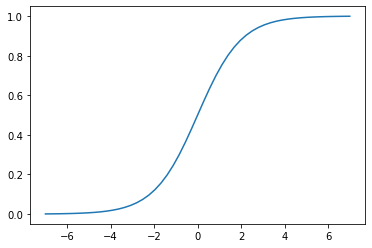

In [206]:
plt.plot(z, sigmoid(z))

Bias is the first element of w, so xi[0] = 1

In [207]:
xi = np.array([1,2,3])
w = np.array([1,1,1])

In [208]:
def linear_regression(xi, w):
    result = 0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [209]:
def logistic_regression(xi, w):
    score = 0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

In [210]:
linear_regression(xi,w)

6

In [211]:
logistic_regression(xi, w)

0.9975273768433653

In [212]:
def linear_regression(xi, w):
    return np.dot(xi,w)

In [213]:
def sigmoid(z):
    return 1 / 1 + np.exp(-z)

In [214]:
def logistic_regression(xi, w):
    return sigmoid(linear_regression(xi,w))

In [215]:
linear_regression(xi,w)

6

In [216]:
logistic_regression(xi, w)

1.0024787521766663

## 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
model = LogisticRegression(solver='lbfgs',  max_iter=100)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

C:\Users\MARCOS\anaconda3\envs\mlzoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
model.intercept_[0]

-0.11237414035414735

In [220]:
model.coef_[0].round(3)

array([ 0.535, -0.183, -0.462, ..., -0.229, -0.069,  0.   ])

In [221]:
y_pred = model.predict_proba(X_val)[:, 1].round(3)
y_pred

array([0.009, 0.205, 0.209, ..., 0.133, 0.797, 0.837])

In [222]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [223]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [224]:
(y_val == churn_decision).mean()

0.8005677785663591

In [225]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 317, dtype: object

In [226]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [227]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [228]:
df_pred.correct.mean()

0.8005677785663591

In [229]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [230]:
small = ['contract', 'tenure', 'monthlycharges']

In [231]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [232]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [233]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [234]:
dv_small.get_feature_names()

C:\Users\MARCOS\anaconda3\envs\mlzoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [235]:
X_train_small = dv_small.transform(dicts_train_small)

In [236]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [237]:
w0 = model_small.intercept_[0]
w0

-2.476775659755188

In [238]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [239]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

C:\Users\MARCOS\anaconda3\envs\mlzoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

Evaluate a customer with monthly contract, 50usd/month, tenure = 24

In [240]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [241]:
sigmoid(_)

33.23329743215228

## 3.12 Using the model

In [242]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [243]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [244]:
y_full_train = df_full_train.churn.values

In [245]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [246]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [247]:
X_test = dv.transform(dicts_test)

In [248]:
y_pred = model.predict_proba(X_test)[:,1]

In [249]:
churn_decision = (y_pred >= 0.5)

In [250]:
(churn_decision == y_test).mean()

0.815471965933286

In [251]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': False,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [252]:
X_small = dv.transform([customer])

In [253]:
model.predict_proba(X_small)[0, 1]

0.5968852088274378

In [254]:
y_test[-1]

1

## 3.13 Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

## 3.14 Explore more

More things

* Try to exclude least useful features


Use scikit-learn in project of last week

* Re-implement train/val/test split using scikit-learn in the project from the last week
* Also, instead of our own linear regression, use `LinearRegression` (not regularized) and `RidgeRegression` (regularized). Find the best regularization parameter for Ridge

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

